In [1]:
import os
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
COLORS = sns.color_palette('colorblind')

In [2]:
if os.getenv('CONTAINER_BASE_DIR'):
    API_DIRECTORY_URL = 'http://api:8080/'
    directory = requests.get(API_DIRECTORY_URL).json()
    directory['result'] = {k: v.replace('localhost', 'api') 
                           for k, v in directory['result'].items()}
else:
    API_DIRECTORY_URL = 'http://localhost:8080/'
    directory = requests.get(API_DIRECTORY_URL).json()

## Grid Search Model Metrics <a class="anchor" id="4-bullet"></a>

In [3]:
raw_grid_data = requests.get(directory['result']['get_grid_cv_results_model_data']).json()

df = pd.DataFrame()
for record in raw_grid_data['result']:
    grid_record = record['message']['data']
    df_grid = pd.DataFrame(grid_record)
    df = pd.concat([df, df_grid], ignore_index=True)

df_grid_melt = df.melt(id_vars=['exp_id'], var_name="metrics", value_name="scores")    

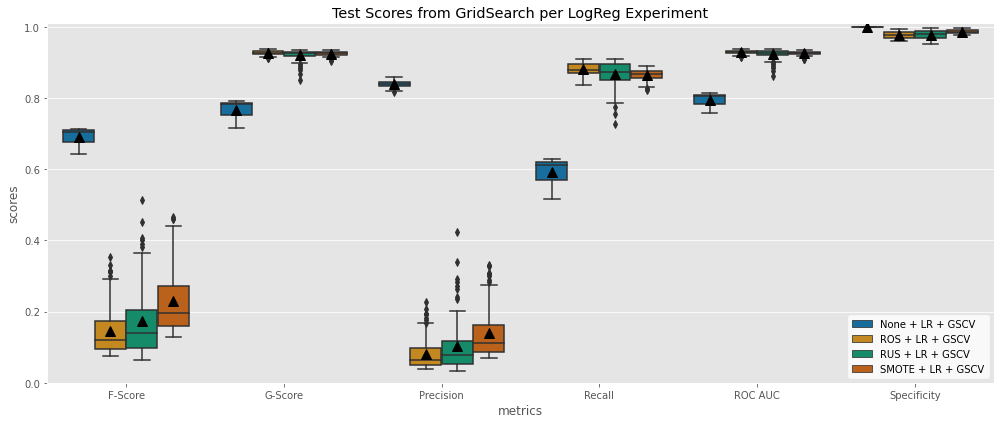

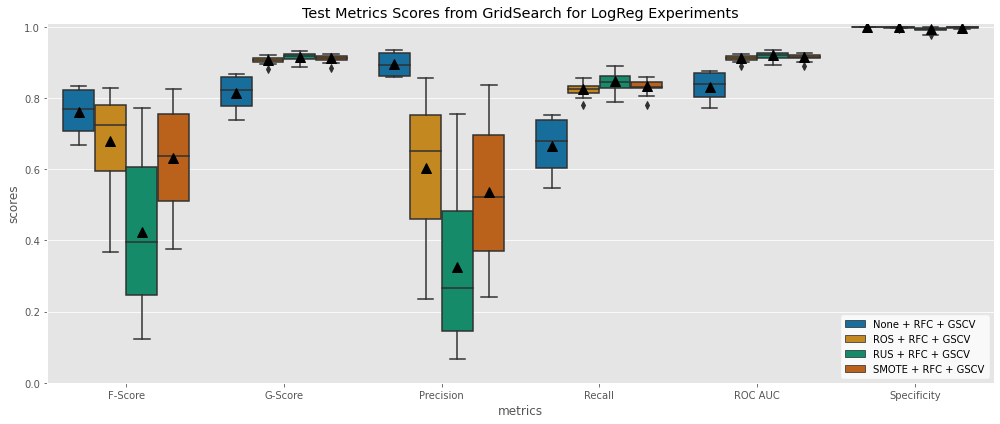

In [4]:
## LogReg
_ = plt.figure(figsize=[14,6])
exp_condition = df_grid_melt['exp_id'].str.contains('LR')
metric_condition = df_grid_melt['metrics'].str.contains('mean_test_')
mask = exp_condition & metric_condition
meanprops = {
    'markerfacecolor':'black', 
    'markeredgecolor':'black',
    'markersize':'10',
}
ax = sns.boxplot(
    data=df_grid_melt[mask],
    x='metrics', 
    y='scores',
    hue='exp_id',
    showmeans=True,
    meanprops=meanprops,
    palette='colorblind')
plt.xticks(range(6), ['F-Score', 'G-Score', 'Precision', 'Recall', 'ROC AUC', 'Specificity'])
plt.legend(loc='lower right', frameon=True).get_frame().set_color('white')
plt.ylim([0,1.01])
plt.title('Test Scores from GridSearch per LogReg Experiment')
plt.tight_layout()

## RanFor
_ = plt.figure(figsize=[14,6])
exp_condition = df_grid_melt['exp_id'].str.contains('RFC')
metric_condition = df_grid_melt['metrics'].str.contains('mean_test_')
mask = exp_condition & metric_condition
meanprops = {
    'markerfacecolor':'black', 
    'markeredgecolor':'black',
    'markersize':'10',
}
ax = sns.boxplot(
    data=df_grid_melt[mask],
    x='metrics', 
    y='scores',
    hue='exp_id',
    showmeans=True,
    meanprops=meanprops,
    palette='colorblind')
plt.xticks(range(6), ['F-Score', 'G-Score', 'Precision', 'Recall', 'ROC AUC', 'Specificity'])
plt.legend(loc='lower right', frameon=True).get_frame().set_color('white')
plt.ylim([0,1.01])
plt.title('Test Metrics Scores from GridSearch for LogReg Experiments')
plt.tight_layout()

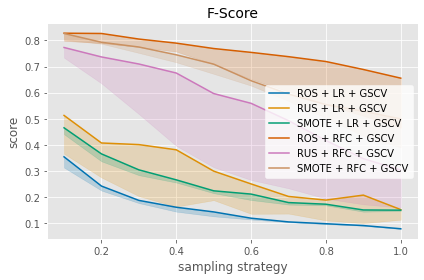

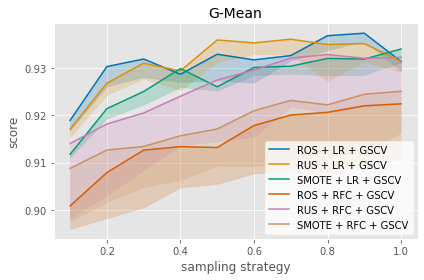

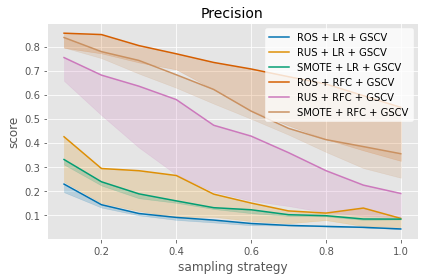

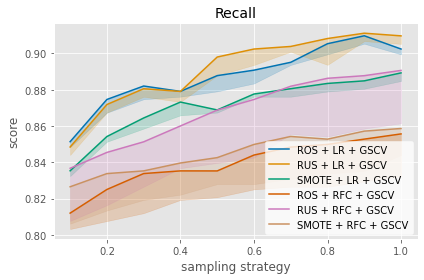

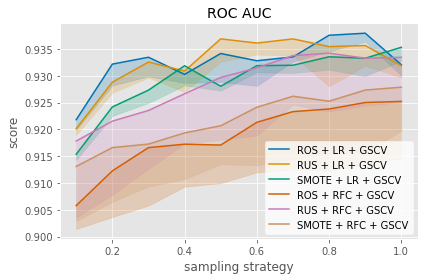

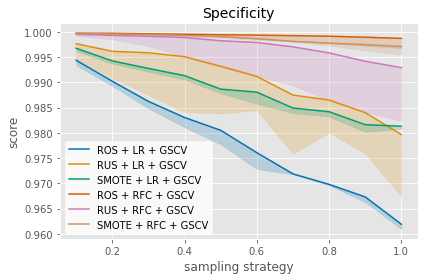

In [5]:
df.loc[df['param_resampling__sampling_strategy'].isnull(), 'param_resampling__sampling_strategy'] = ''

titles = ['F-Score', 'G-Mean', 'Precision', 'Recall', 'ROC AUC', 'Specificity']
metrics = [col for col in df.columns if col.startswith('mean_test_')]
mask = (df['param_resampling__sampling_strategy'] != '')
cols = ['exp_id', 'param_resampling__sampling_strategy'] + metrics

for index, metric in enumerate(metrics):
    _ = plt.figure(figsize=[6,4])
    ax = sns.lineplot(
        data=df.loc[mask, cols],
        x='param_resampling__sampling_strategy',
        y=metric,
        hue='exp_id',
        estimator=np.max,
        palette='colorblind')
#     for container in ax.containers:
#         labels = [f'{value:.1f}%' for value in container.datavalues*100]
#         ax.bar_label(container, labels, label_type='center', color='white', rotation=30)
    plt.legend(loc='best', frameon=True).get_frame().set_color('white')
    plt.title(titles[index], fontsize=14)
    plt.xlabel('sampling strategy')
    plt.ylabel('score')
    plt.tight_layout()

In [6]:
metrics = [col for col in df.columns if col.startswith('mean_test_')]
mask = df['param_resampling__sampling_strategy'] != ''
cols = ['exp_id', 'param_estimator__C'] + metrics
df.loc[mask, cols].groupby(['exp_id', 'param_estimator__C']).max()

mean_test_f1  \
exp_id            param_estimator__C                 
ROS + LR + GSCV   0.001000                0.354262   
                  0.002855                0.313125   
                  0.008149                0.311514   
                  0.023263                0.291661   
                  0.066408                0.313341   
                  0.189574                0.299299   
                  0.541170                0.279571   
                  1.544859                0.330670   
                  4.410059                0.312868   
                  12.589254               0.278731   
RUS + LR + GSCV   0.001000                0.512903   
                  0.002855                0.452330   
                  0.008149                0.361943   
                  0.023263                0.365981   
                  0.066408                0.312856   
                  0.189574                0.303299   
                  0.541170                0.299227   
                  1.544859                0.281603   
                  4.410059                0.273508   
                  12.589254               0.289484   
SMOTE + LR + GSCV 0.001000                0.465450   
                  0.002855                0.433782   
                  0.008149                0.440828   
                  0.023263                0.461543   
                  0.066408                0.440351   
                  0.189574                0.415596   
                  0.541170                0.406088   
                  1.544859                0.461592   
                  4.410059                0.437591   
                  12.589254               0.419421   

                                      mean_test_geometric_mean_score  \
exp_id            param_estimator__C                                   
ROS + LR + GSCV   0.001000                                  0.935656   
                  0.002855                                  0.934585   
                  0.008149                                  0.936818   
                  0.023263                                  0.937349   
                  0.066408                                  0.933936   
                  0.189574                                  0.934831   
                  0.541170                                  0.934228   
                  1.544859                                  0.937084   
                  4.410059                                  0.935555   
                  12.589254                                 0.935902   
RUS + LR + GSCV   0.001000                                  0.905705   
                  0.002855                                  0.919321   
                  0.008149                                  0.927672   
                  0.023263                                  0.932399   
                  0.066408                                  0.936074   
                  0.189574                                  0.934039   
                  0.541170                                  0.935160   
                  1.544859                                  0.935920   
                  4.410059                                  0.933752   
                  12.589254                                 0.935303   
SMOTE + LR + GSCV 0.001000                                  0.928779   
                  0.002855                                  0.931879   
                  0.008149                                  0.930014   
                  0.023263                                  0.932010   
                  0.066408                                  0.930681   
                  0.189574                                  0.931479   
                  0.541170                                  0.934004   
                  1.544859                                  0.930375   
                  4.410059                                  0.931797   
                  12.589254                                 0.929357   

    

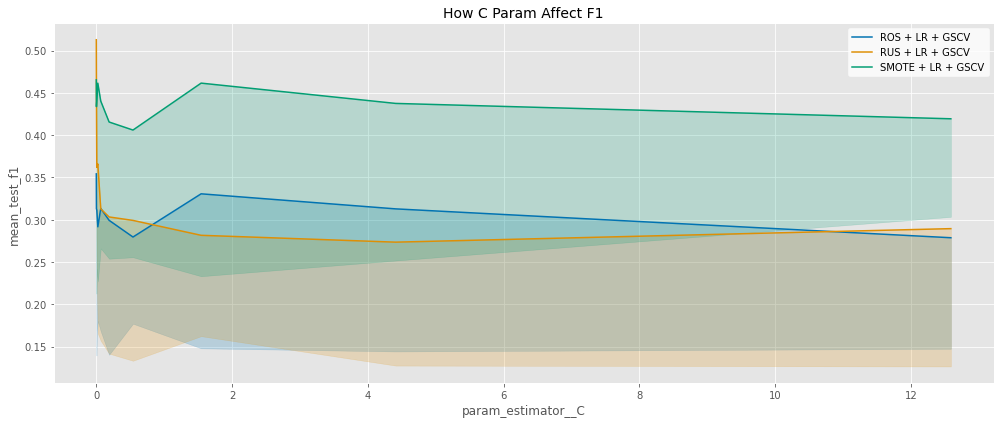

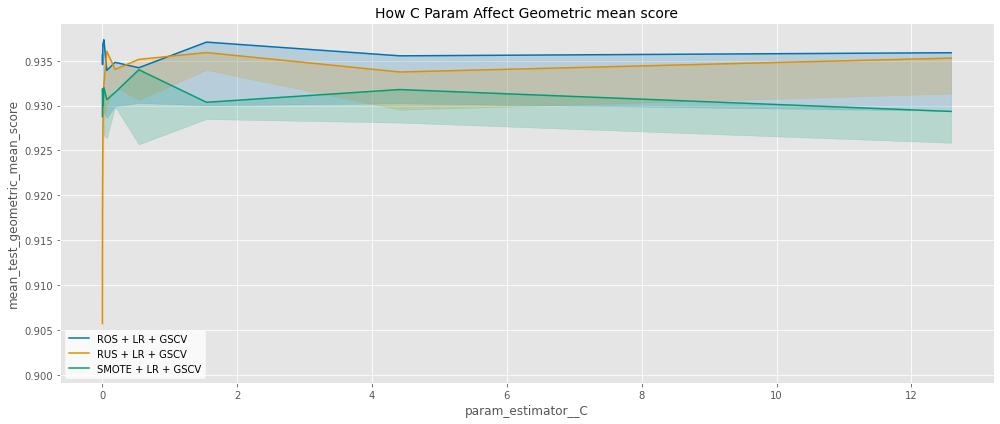

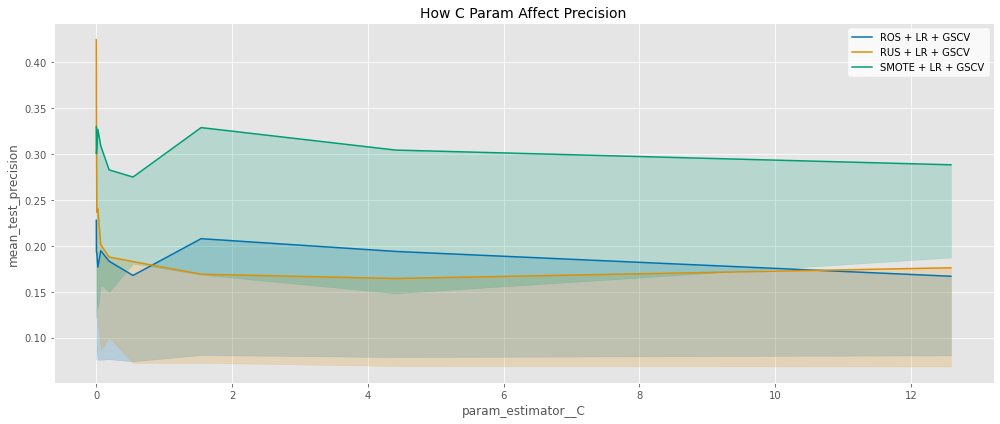

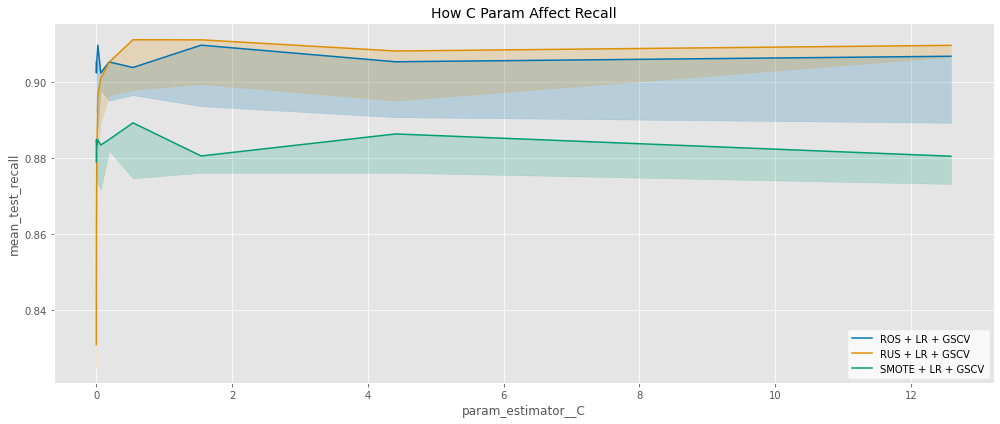

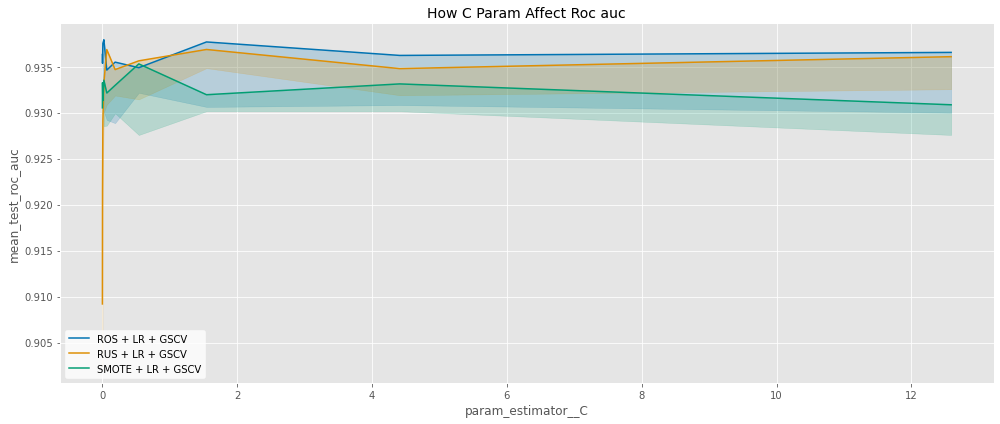

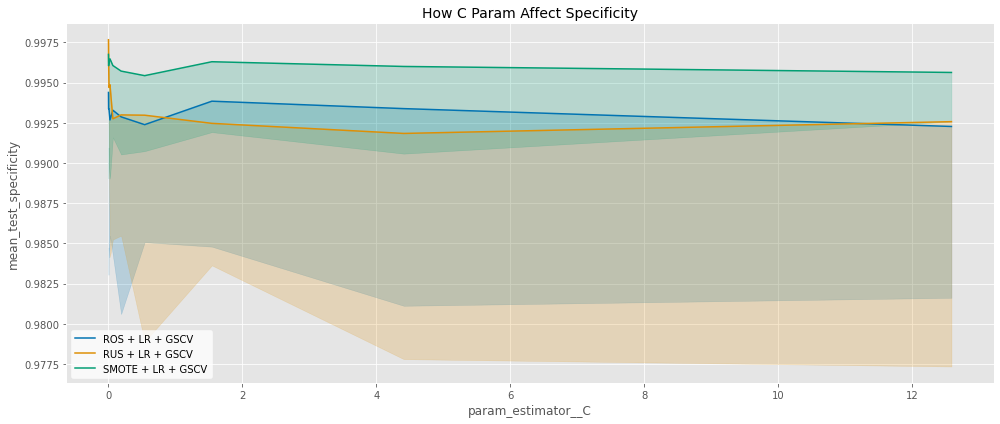

In [7]:
metrics = [col for col in df.columns if col.startswith('mean_test_')]
mask = ~(df['param_estimator__C'].isnull())
cols = ['exp_id', 'param_estimator__C'] + metrics

for metric in metrics:
    _ = plt.figure(figsize=[14,6])
    ax = sns.lineplot(
        data=df.loc[mask, cols],
        x='param_estimator__C',
        y=metric,
        hue='exp_id',
        estimator=np.max,
        palette='colorblind')
    plt.legend(loc='best', frameon=True).get_frame().set_color('white')
    pretty_metric = metric.replace('mean_test_', '').replace('_', ' ').capitalize()
    plt.title(f'How C Param Affect {pretty_metric}', fontsize=14)
    plt.tight_layout()

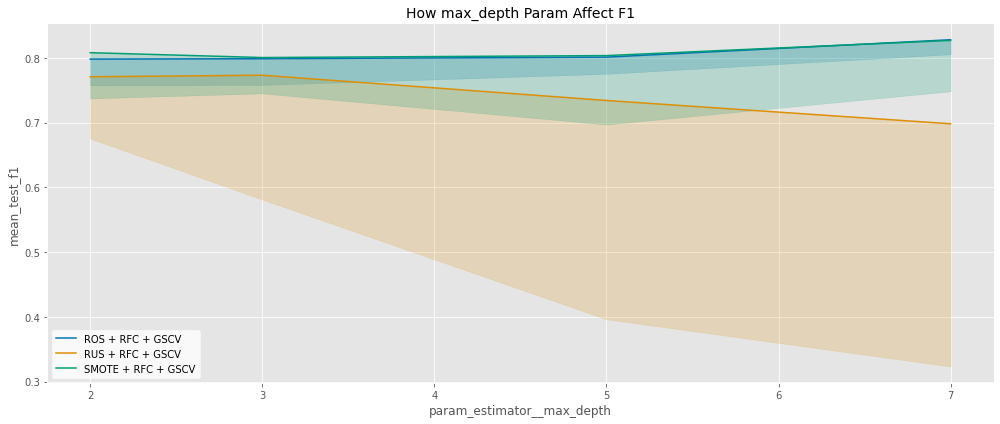

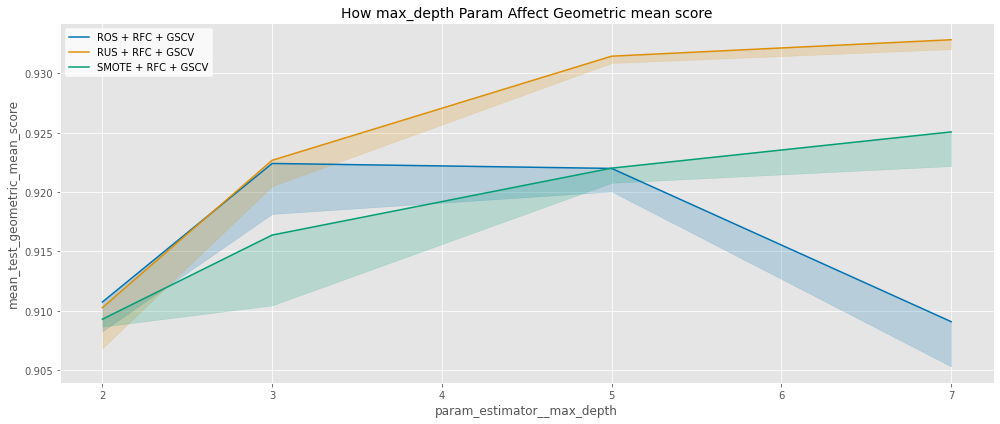

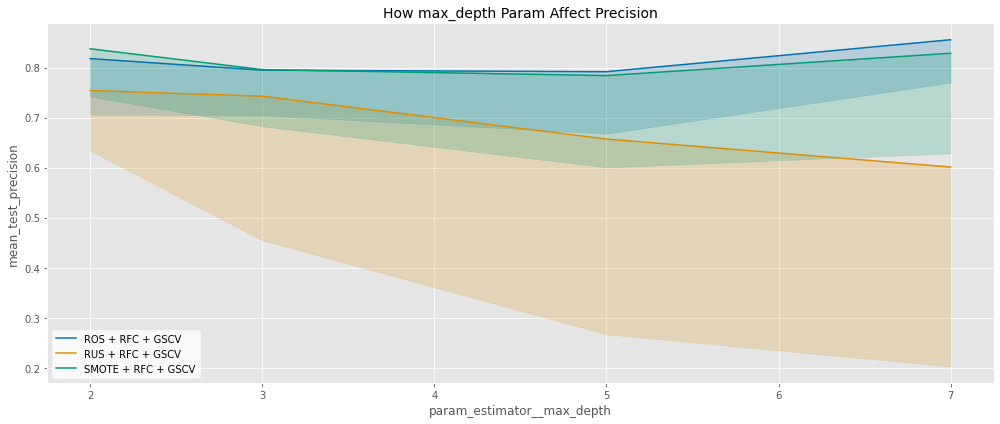

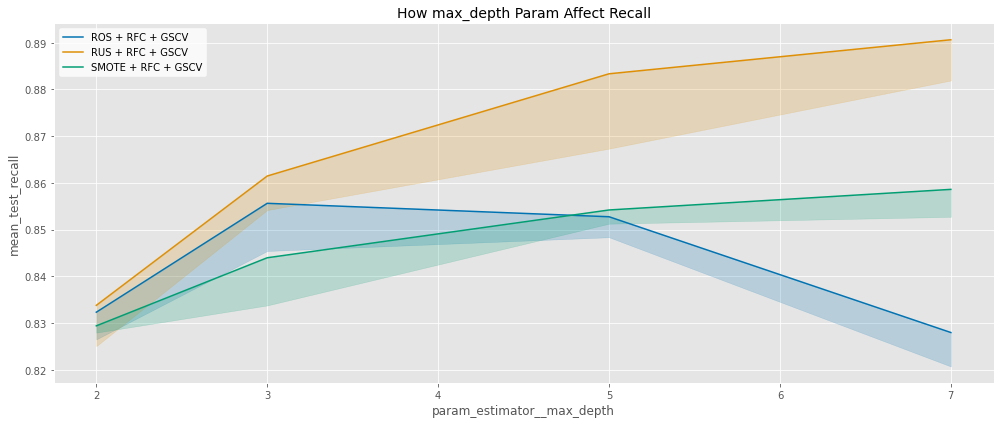

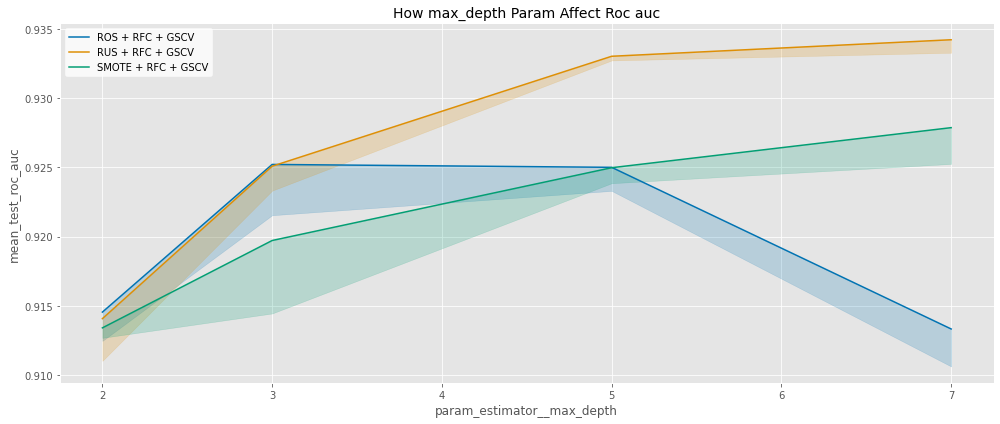

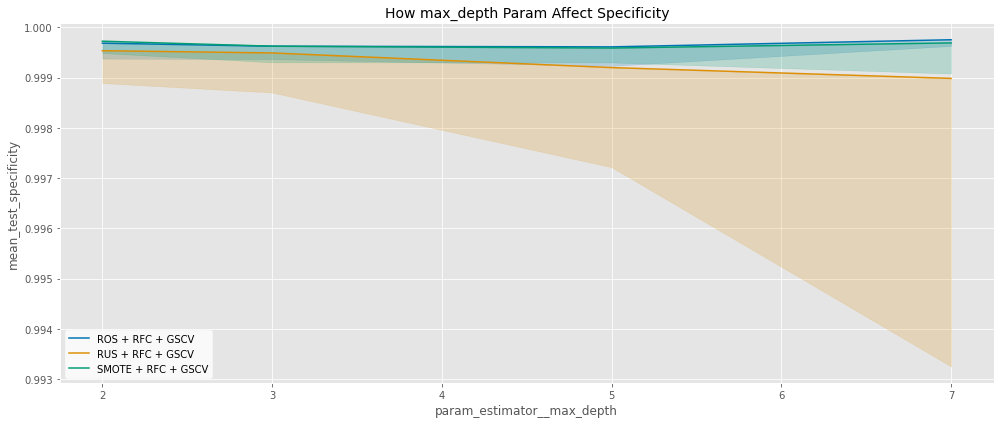

In [8]:
metrics = [col for col in df.columns if col.startswith('mean_test_')]
mask = ~(df['param_estimator__max_depth'].isnull())
cols = ['exp_id', 'param_estimator__max_depth'] + metrics

for metric in metrics:
    _ = plt.figure(figsize=[14,6])
    ax = sns.lineplot(
        data=df.loc[mask, cols],
        x='param_estimator__max_depth',
        y=metric,
        hue='exp_id',
        estimator=np.max,
        palette='colorblind')
    plt.legend(loc='best', frameon=True).get_frame().set_color('white')
    pretty_metric = metric.replace('mean_test_', '').replace('_', ' ').capitalize()
    plt.title(f'How max_depth Param Affect {pretty_metric}', fontsize=14)
    plt.tight_layout()

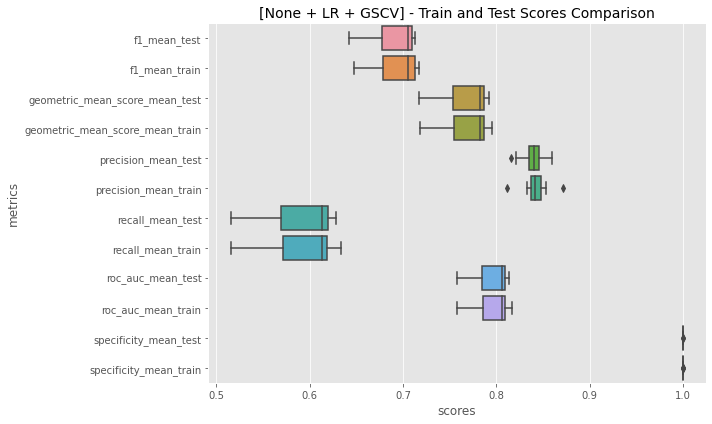

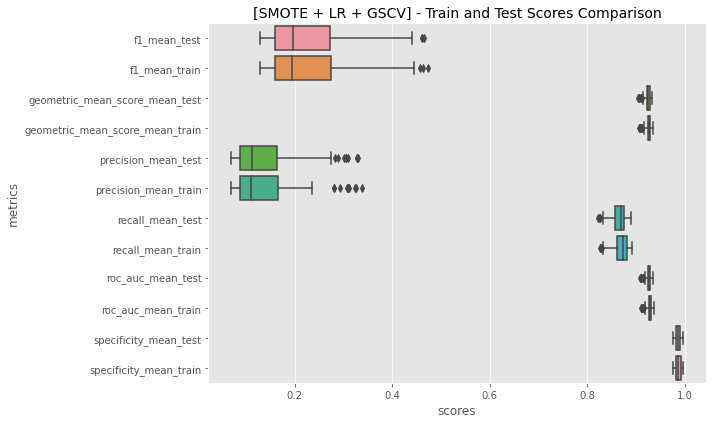

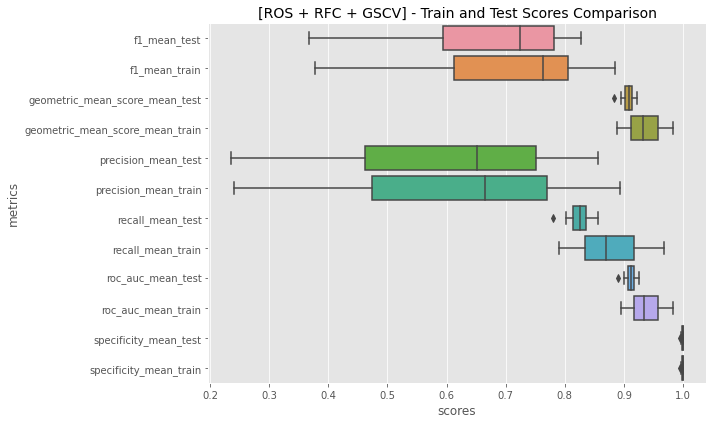

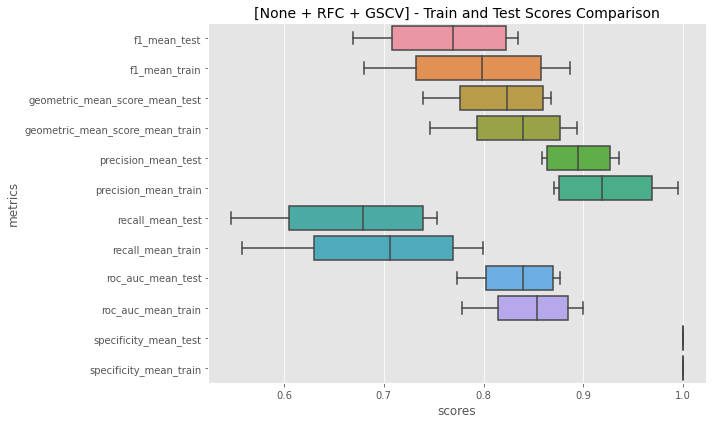

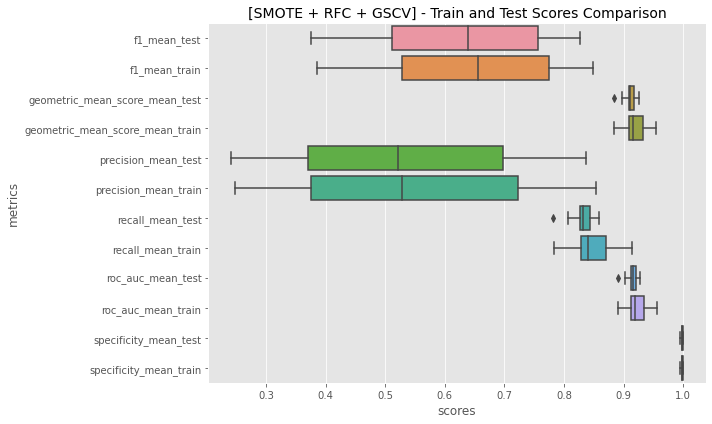

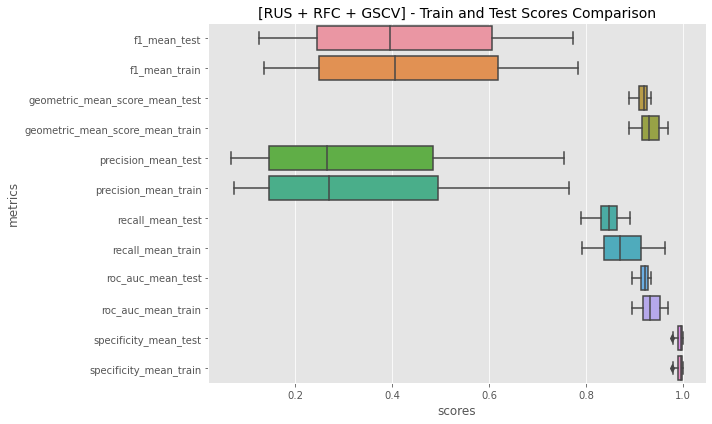

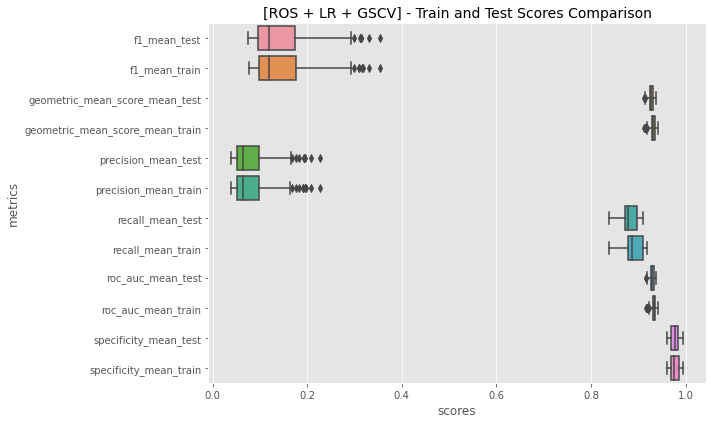

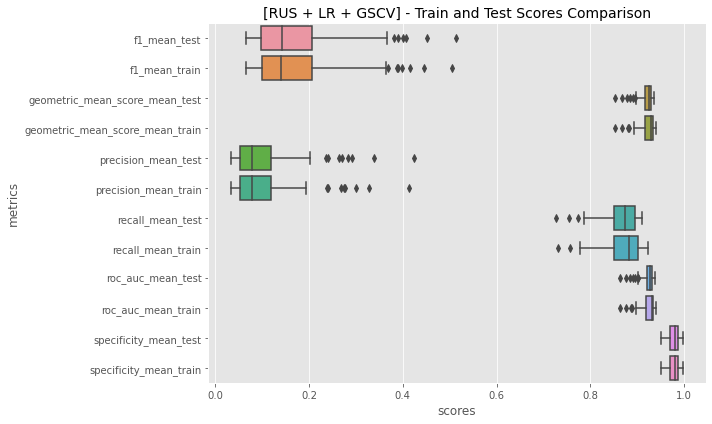

In [9]:
## comparison between train and test scores

metrics = [col for col in df.columns 
           if col.startswith('mean_test_') 
           or col.startswith('mean_train_')]

train_test_comparison = df[['exp_id'] + metrics].melt(
    id_vars=['exp_id'],
    value_vars=metrics,
    var_name='metrics',
    value_name='scores',
    ignore_index=True)

train_test_comparison['metrics'] = train_test_comparison['metrics'].apply(
    lambda string: '_'.join(string.split('_')[2:] + string.split('_')[:2]))

train_test_comparison.sort_values('metrics', inplace=True, ignore_index=True)

for exp in train_test_comparison['exp_id'].unique():
    mask = train_test_comparison['exp_id'] == exp
    train_test_comparison.loc[mask]
    
    _ = plt.figure(figsize=[10,6])
    plt.title(f'[{exp}] - Train and Test Scores Comparison', fontsize=14)
    sns.boxplot(
        data=train_test_comparison.loc[mask],
        x='scores',
        y='metrics',
        orient='h')
    plt.tight_layout()

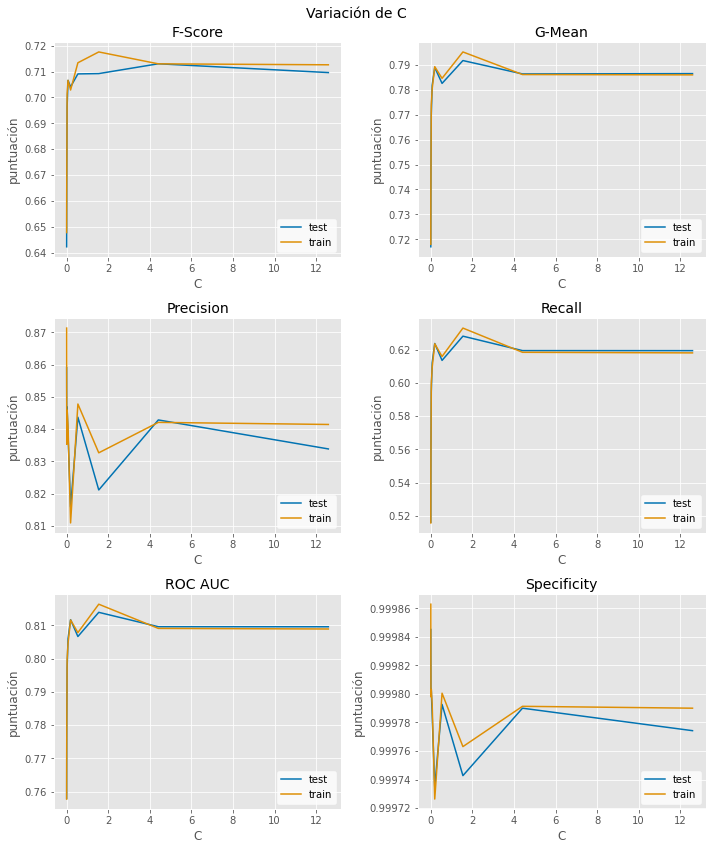

In [10]:
## how C variation does affect LogReg metric scores:

metrics = [col for col in df.columns 
           if col.startswith('mean_test_') 
           or col.startswith('mean_train_')]
mask = df['param_resampling__sampling_strategy'] == ''
cols = ['exp_id', 'param_C'] + metrics

metric_to_plot = [col.replace('mean_test_', '') for col in df.columns 
                  if col.startswith('mean_test_')]
titles = [
    'F-Score', 'G-Mean', 'Precision',
    'Recall', 'ROC AUC', 'Specificity']

_ = plt.figure(figsize=[10,12])
plt.suptitle('Variación de C', fontsize=14)
for index, metric in enumerate(metric_to_plot):
    plt.subplot(3,2,index+1)

    sns.lineplot(
        data=df.loc[mask, cols],
        x='param_C',
        y=f'mean_test_{metric}',
        label=f'test',
        color=COLORS[0])
    sns.lineplot(
        data=df.loc[mask, cols],
        x='param_C',
        y=f'mean_train_{metric}',
        label=f'train',
        color=COLORS[1])
    plt.title(titles[index], fontsize=14)
    plt.ylabel('puntuación')
    plt.xlabel('C')
    plt.legend(loc='lower right', frameon=True)\
        .get_frame().set_color('white')
    
    plt.tight_layout()

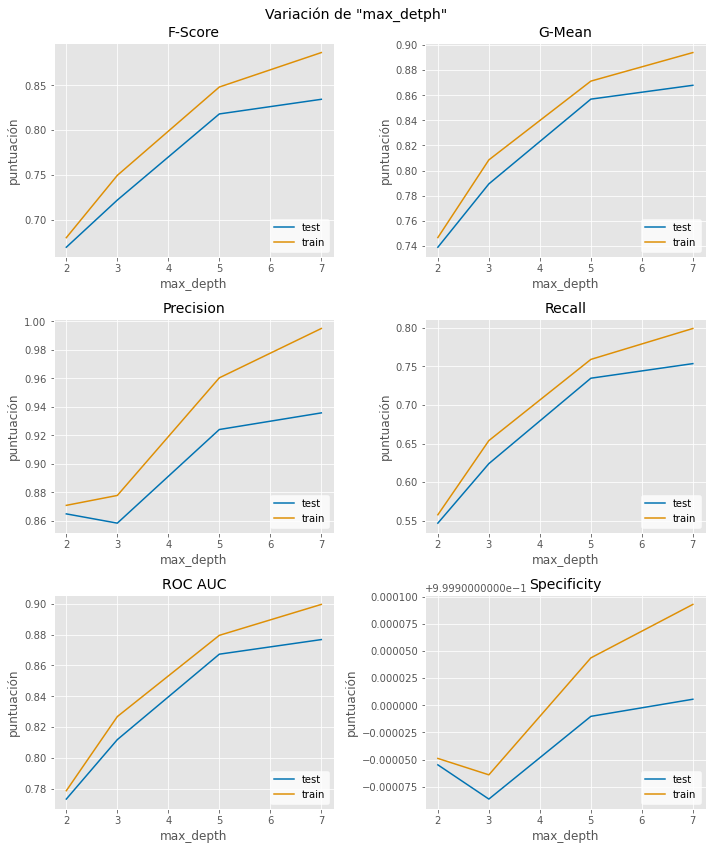

In [11]:
## how MAX_DEPTH variation does affect RanFor metric scores:

metrics = [col for col in df.columns 
           if col.startswith('mean_test_') 
           or col.startswith('mean_train_')]
mask = df['param_resampling__sampling_strategy'] == ''
cols = ['exp_id', 'param_max_depth'] + metrics
metric_to_plot = [col.replace('mean_test_', '') for col in df.columns 
                  if col.startswith('mean_test_')]
_ = plt.figure(figsize=[10,12])
plt.suptitle('Variación de "max_detph"', fontsize=14)
for index, metric in enumerate(metric_to_plot):
    plt.subplot(3,2,index+1)
    
    sns.lineplot(
        data=df.loc[mask, cols],
        x='param_max_depth',
        y=f'mean_test_{metric}',
        label='test',
        color=COLORS[0])
    
    sns.lineplot(
        data=df.loc[mask, cols],
        x='param_max_depth',
        y=f'mean_train_{metric}',
        label='train',
        color=COLORS[1])
    
    plt.title(titles[index], fontsize=14)
    plt.ylabel('puntuación')
    plt.xlabel('max_depth')
    plt.legend(loc='lower right', frameon=True)\
        .get_frame().set_color('white')

plt.tight_layout()

---

## Best Params Data

In [12]:
from typing import List

def get_describe_table(df: pd.DataFrame, columns: List[str], sort_by: str, ascending=True):
    return df[['exp_id', 'mean_train_n_test_diff'] + columns] \
        .sort_values(sort_by, ascending=ascending) \
        .style.background_gradient(axis=0, cmap='YlOrRd')


def set_bar_annotation(ax, loc='center', color='white', rotation=0):
    for container in ax.containers:
        labels = [f'{value:.2f}%' for value in container.datavalues*100]
        ax.bar_label(
            container, labels=labels, label_type=loc, 
            color=color, rotation=rotation)

In [13]:
# filter grid_cv_results -> List[GridSearchCV.cv_results_] for:
# roc_auc best params -> df['rank_test_roc_auc'] == 1.0, and
# roc_auc columns
roc_auc_cols = [col for col in df.columns if 'roc_auc' in col and 'rank_' not in col]
df_roc_auc_best = df.loc[df['rank_test_roc_auc'] == 1.0, ['exp_id', 'params'] + roc_auc_cols]

# get just split_train and split_test column names to later filter the df by column
split_train_cols = [col for col in df_roc_auc_best.columns if 'split' in col and 'train' in col]
split_test_cols = [col for col in df_roc_auc_best.columns if 'split' in col and 'test' in col]

# get max and min for split_test and split_train columns for every exp_id
df_roc_auc_best['max_test_roc_auc'] = df_roc_auc_best[split_test_cols].max(axis=1)
df_roc_auc_best['min_test_roc_auc'] = df_roc_auc_best[split_test_cols].min(axis=1)
df_roc_auc_best['max_train_roc_auc'] = df_roc_auc_best[split_train_cols].max(axis=1)
df_roc_auc_best['min_train_roc_auc'] = df_roc_auc_best[split_train_cols].min(axis=1)

In [14]:
to_boxplot = df_roc_auc_best[['exp_id'] + split_test_cols + split_train_cols].melt(
    id_vars='exp_id', var_name='metric', value_name='score')

to_boxplot.loc[to_boxplot['metric'].str.contains('split[0-9]_test_'), 'metric'] = 'test'
to_boxplot.loc[to_boxplot['metric'].str.contains('split[0-9]_train_'), 'metric'] = 'train'

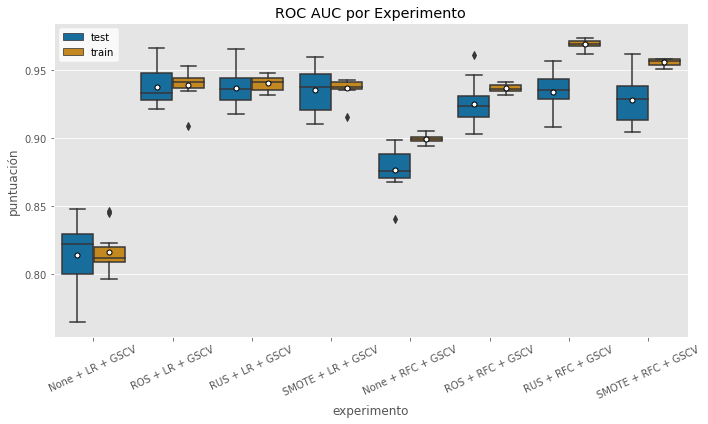

In [15]:
_ = plt.figure(figsize=[10,6])
sns.boxplot(
    data=to_boxplot, 
    x='exp_id', 
    y='score', 
    hue='metric', 
    palette='colorblind',
    showmeans=True, 
    meanprops={
        'marker':'.',
        'markerfacecolor':'white', 
        'markeredgecolor':'black',
        'markersize':'10'})
plt.title('ROC AUC por Experimento')
plt.xlabel('experimento')
plt.ylabel('puntuación')
plt.xticks(rotation=25)
plt.legend(loc='best', frameon=True) \
    .get_frame().set_color('white')
plt.tight_layout()

In [16]:
# drop split_test and split_train columns; they're not needed anymore
cols_to_drop = split_test_cols + split_train_cols
df_roc_auc_best.drop(columns=cols_to_drop, inplace=True)

# get train and test column names to later filter the df by column
train_cols = [col for col in df_roc_auc_best.columns if 'train_roc_auc' in col]
test_cols = [col for col in df_roc_auc_best.columns if 'test_roc_auc' in col]

# df_roc_auc_best[['sm', 'ml', 'cv']] = df_roc_auc_best['exp_id'].str.split('+', 2, expand=True)

# get difference between mean_train_roc_auc and mean_test_roc_auc
df_roc_auc_best['mean_train_n_test_diff'] = \
    df_roc_auc_best['mean_train_roc_auc'] - df_roc_auc_best['mean_test_roc_auc']

In [17]:
df_roc_auc_best[['exp_id', 'mean_train_n_test_diff'] + train_cols]

,exp_id,mean_train_n_test_diff,mean_train_roc_auc,std_train_roc_auc,max_train_roc_auc,min_train_roc_auc
7,None + LR + GSCV,0.002447,0.816395,0.016379,0.846443,0.796259
48,ROS + LR + GSCV,0.001167,0.939101,0.011230,0.953267,0.909099
184,RUS + LR + GSCV,0.003590,0.940465,0.005292,0.948031,0.932006
279,SMOTE + LR + GSCV,0.001472,0.936779,0.007405,0.942848,0.915828
313,None + RFC + GSCV,0.022821,0.899596,0.002845,0.905109,0.894542
333,ROS + RFC + GSCV,0.011516,0.936730,0.002640,0.941042,0.931934
391,RUS + RFC + GSCV,0.035122,0.969331,0.003427,0.974009,0.962065
433,SMOTE + RFC + GSCV,0.027934,0.955800,0.002741,0.958591,0.951224


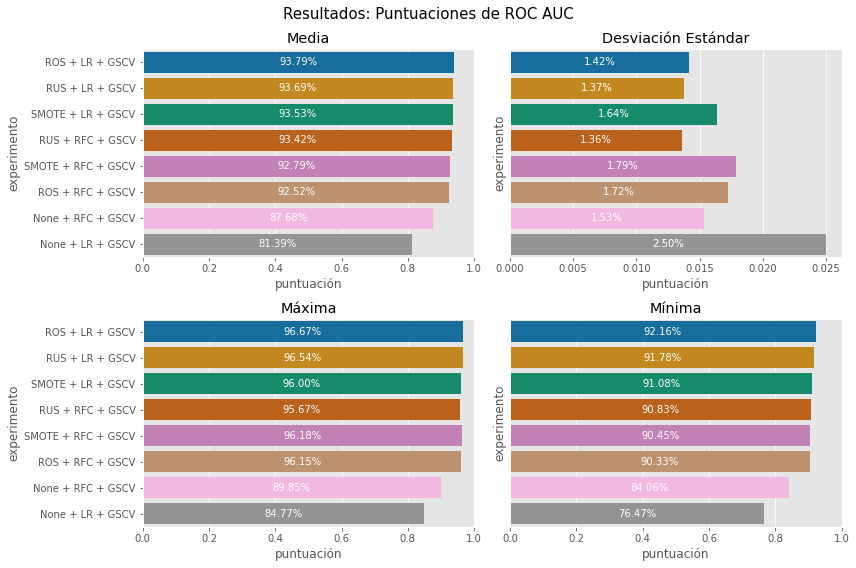

In [18]:
fig = plt.figure(figsize=[12,8])
plt.suptitle('Resultados: Puntuaciones de ROC AUC', fontsize='15')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=COLORS)

plt.subplot(2,2,1)
ax = sns.barplot(
    data=df_roc_auc_best, x='mean_test_roc_auc', y='exp_id', 
    order=df_roc_auc_best.sort_values(
        'mean_test_roc_auc', ascending=False).exp_id)
plt.title('Media'); plt.xlabel('puntuación'); plt.ylabel('experimento')
plt.xlim([0,1])
set_bar_annotation(ax)

plt.subplot(2,2,2)
ax = sns.barplot(
    data=df_roc_auc_best, x='std_test_roc_auc', y='exp_id', 
    order=df_roc_auc_best.sort_values(
        'mean_test_roc_auc', ascending=False).exp_id)
plt.title('Desviación Estándar'); plt.xlabel('puntuación')
plt.ylabel('experimento')
plt.tick_params(left=False, labelleft=False)
set_bar_annotation(ax)

plt.subplot(2,2,3)
ax = sns.barplot(
    data=df_roc_auc_best, x='max_test_roc_auc', y='exp_id', 
    order=df_roc_auc_best.sort_values(
        'mean_test_roc_auc', ascending=False).exp_id)
plt.title('Máxima'); plt.xlabel('puntuación'); plt.ylabel('experimento')
plt.xlim([0,1])
set_bar_annotation(ax)

plt.subplot(2,2,4)
ax = sns.barplot(
    data=df_roc_auc_best, x='min_test_roc_auc', y='exp_id', 
    order=df_roc_auc_best.sort_values(
        'mean_test_roc_auc', ascending=False).exp_id)
plt.title('Mínima'); plt.xlabel('puntuación'); plt.ylabel('experimento')
plt.xlim([0,1])
plt.tick_params(left=False, labelleft=False)
set_bar_annotation(ax)

plt.tight_layout()

In [19]:
df_melt = df.loc[
    df['rank_test_roc_auc'] == 1.0, 
    ['exp_id'] + list(df.select_dtypes("number").columns)] \
    .melt(id_vars='exp_id', var_name='metric', value_name='score')

metrics = [col.replace('mean_test_', '') for col in df.columns if col.startswith('mean_test_')]
for metric in metrics:
    df_melt.loc[df_melt['metric'].str.contains(f'split[0-9]_test_{metric}'), 'metric'] = f'split_test_{metric}'
    df_melt.loc[df_melt['metric'].str.contains(f'split[0-9]_train_{metric}'), 'metric'] = f'split_train_{metric}'

exp_condition = df_melt['exp_id'] == 'ROS + LR + GSCV'
rank_condition = ~df_melt['metric'].str.contains('rank')
param_condition = ~df_melt['metric'].str.contains('param')
mask = exp_condition & rank_condition & param_condition

df_melt.loc[mask, ['metric', 'score']] \
    .groupby('metric').mean() \
    .reset_index();

In [20]:
import re

dua_df = df.copy()

for metric in metrics:
    split_test_cols = [
        col for col in dua_df.columns if re.match(f'split[0-9]_test_{metric}', col)]
    split_train_cols = [
        col for col in dua_df.columns if re.match(f'split[0-9]_train_{metric}', col)]
    dua_df[f'max_split_test_{metric}'] = dua_df[split_test_cols].max(axis=1)
    dua_df[f'median_split_test_{metric}'] = dua_df[split_test_cols].median(axis=1)
    dua_df[f'min_split_test_{metric}'] = dua_df[split_test_cols].min(axis=1)
    dua_df[f'max_split_train_{metric}'] = dua_df[split_train_cols].max(axis=1)
    dua_df[f'median_split_train_{metric}'] = dua_df[split_train_cols].median(axis=1)
    dua_df[f'min_split_train_{metric}'] = dua_df[split_train_cols].min(axis=1)

dua_df.drop(
    columns=[col for col in dua_df.columns if re.match(f'split[0-9]', col)],
    inplace=True)


In [21]:
mapper = {
        'f1': 'F-Score', 
        'geometric_mean_score': 'G-Mean',
        'precision': 'Precision', 
        'recall': 'Recall', 
        'roc_auc': 'ROC AUC',
        'specificity': 'Specificity'}

df_describe = pd.DataFrame()
for exp_id in dua_df['exp_id'].unique():
    for metric in metrics:
        cols = [col for col in dua_df.columns if f'test_{metric}' in col]
        dff = dua_df.loc[
            (dua_df['exp_id'] == exp_id) & (dua_df['rank_test_roc_auc'] == 1), cols]
        dff.columns = ['mean', 'rank', 'std', 'max', 'median', 'min']
        dff.set_index([pd.Index([exp_id]), pd.Index([mapper[metric]])], inplace=True)
        df_describe = pd.concat([df_describe, dff])

In [22]:
df_describe = df_describe[['rank', 'min', 'median', 'mean', 'std', 'max']].reset_index()\
    .rename(columns={'level_0': 'exp_id', 'level_1': 'metric'})

In [23]:
df_describe.to_csv('../../data/tables/describe_table.csv')

In [24]:
df_describe

,exp_id,metric,rank,min,median,mean,std,max
0,None + LR + GSCV,F-Score,3.0,0.660870,0.719008,0.709193,0.038719,0.762712
1,None + LR + GSCV,G-Mean,1.0,0.727569,0.802903,0.791812,0.032020,0.833959
2,None + LR + GSCV,Precision,9.0,0.671642,0.834514,0.821108,0.063145,0.900000
3,None + LR + GSCV,Recall,1.0,0.529412,0.644928,0.628154,0.049999,0.695652
4,None + LR + GSCV,ROC AUC,1.0,0.764653,0.822267,0.813949,0.024982,0.847708
5,None + LR + GSCV,Specificity,9.0,0.999422,0.999764,0.999743,0.000124,0.999895
6,ROS + LR + GSCV,F-Score,84.0,0.071672,0.085781,0.089442,0.011655,0.105903
7,ROS + LR + GSCV,G-Mean,1.0,0.920122,0.932635,0.937349,0.014583,0.966728
8,ROS + LR + GSCV,Precision,84.0,0.037300,0.044942,0.047090,0.006502,0.056338
9,ROS + LR + GSCV,Recall,1.0,0.869565,0.904412,0.909740,0.030825,0.970588
